# Conclusion

In [8]:
import json
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# read the results file
f = open('results.json')
results = json.load(f)

print(results)

{'knn': {'scores_vanilla': {'with_stroke': 96.813, 'without_stroke': 96.909}, 'scores_after_hp_tuning': {'with_stroke': 97.134, 'without_stroke': 97.227}, 'percentage_increase': {'with_stroke': 0.332, 'without_stroke': 0.328}, 'time': {'time_to_train_final_model': 3.226, 'inference_time_on_final_model': 281.979}}, 'svm': {'scores_vanilla': {'with_stroke': 82.657, 'without_stroke': 80.872}, 'scores_after_hp_tuning': {'with_stroke': 96.355, 'without_stroke': 96.304}, 'percentage_increase': {'with_stroke': 16.572, 'without_stroke': 19.082}, 'time': {'time_to_train_final_model': 936.506, 'inference_time_on_final_model': 209.133}}, 'rf': {'scores_vanilla': {'with_stroke': 97.662, 'without_stroke': 97.762}, 'scores_after_hp_tuning': {'with_stroke': 97.824, 'without_stroke': 97.919}, 'percentage_increase': {'with_stroke': 0.166, 'without_stroke': 0.161}, 'time': {'time_to_train_final_model': 1.3958, 'inference_time_on_final_model': 0.0809}}}


In [4]:
print(results.keys())

dict_keys(['knn', 'svm', 'rf'])


In [7]:
x_axis_labels = ['K-Nearest Neighbors', 'Support Vector Machine', 'Random Forest']

f1_scores_original_with_stroke = [results['knn']['scores_vanilla']['with_stroke'], 
                                  results['svm']['scores_vanilla']['with_stroke'],
                                  results['rf']['scores_vanilla']['with_stroke']]

f1_scores_original_without_stroke = [results['knn']['scores_vanilla']['without_stroke'], 
                                     results['svm']['scores_vanilla']['without_stroke'], 
                                     results['rf']['scores_vanilla']['without_stroke']]

f1_scores_hp_tune_with_stroke = [results['knn']['scores_after_hp_tuning']['with_stroke'], 
                                 results['svm']['scores_after_hp_tuning']['with_stroke'], 
                                 results['rf']['scores_after_hp_tuning']['with_stroke']]

f1_scores_hp_tune_without_stroke = [results['knn']['scores_after_hp_tuning']['without_stroke'], 
                                    results['svm']['scores_after_hp_tuning']['without_stroke'], 
                                    results['rf']['scores_after_hp_tuning']['without_stroke']]

print(f1_scores_original_with_stroke)
print(f1_scores_original_without_stroke)
print(f1_scores_hp_tune_with_stroke)
print(f1_scores_hp_tune_without_stroke)

[96.813, 82.657, 97.662]
[96.909, 80.872, 97.762]
[97.134, 96.355, 97.824]
[97.227, 96.304, 97.919]


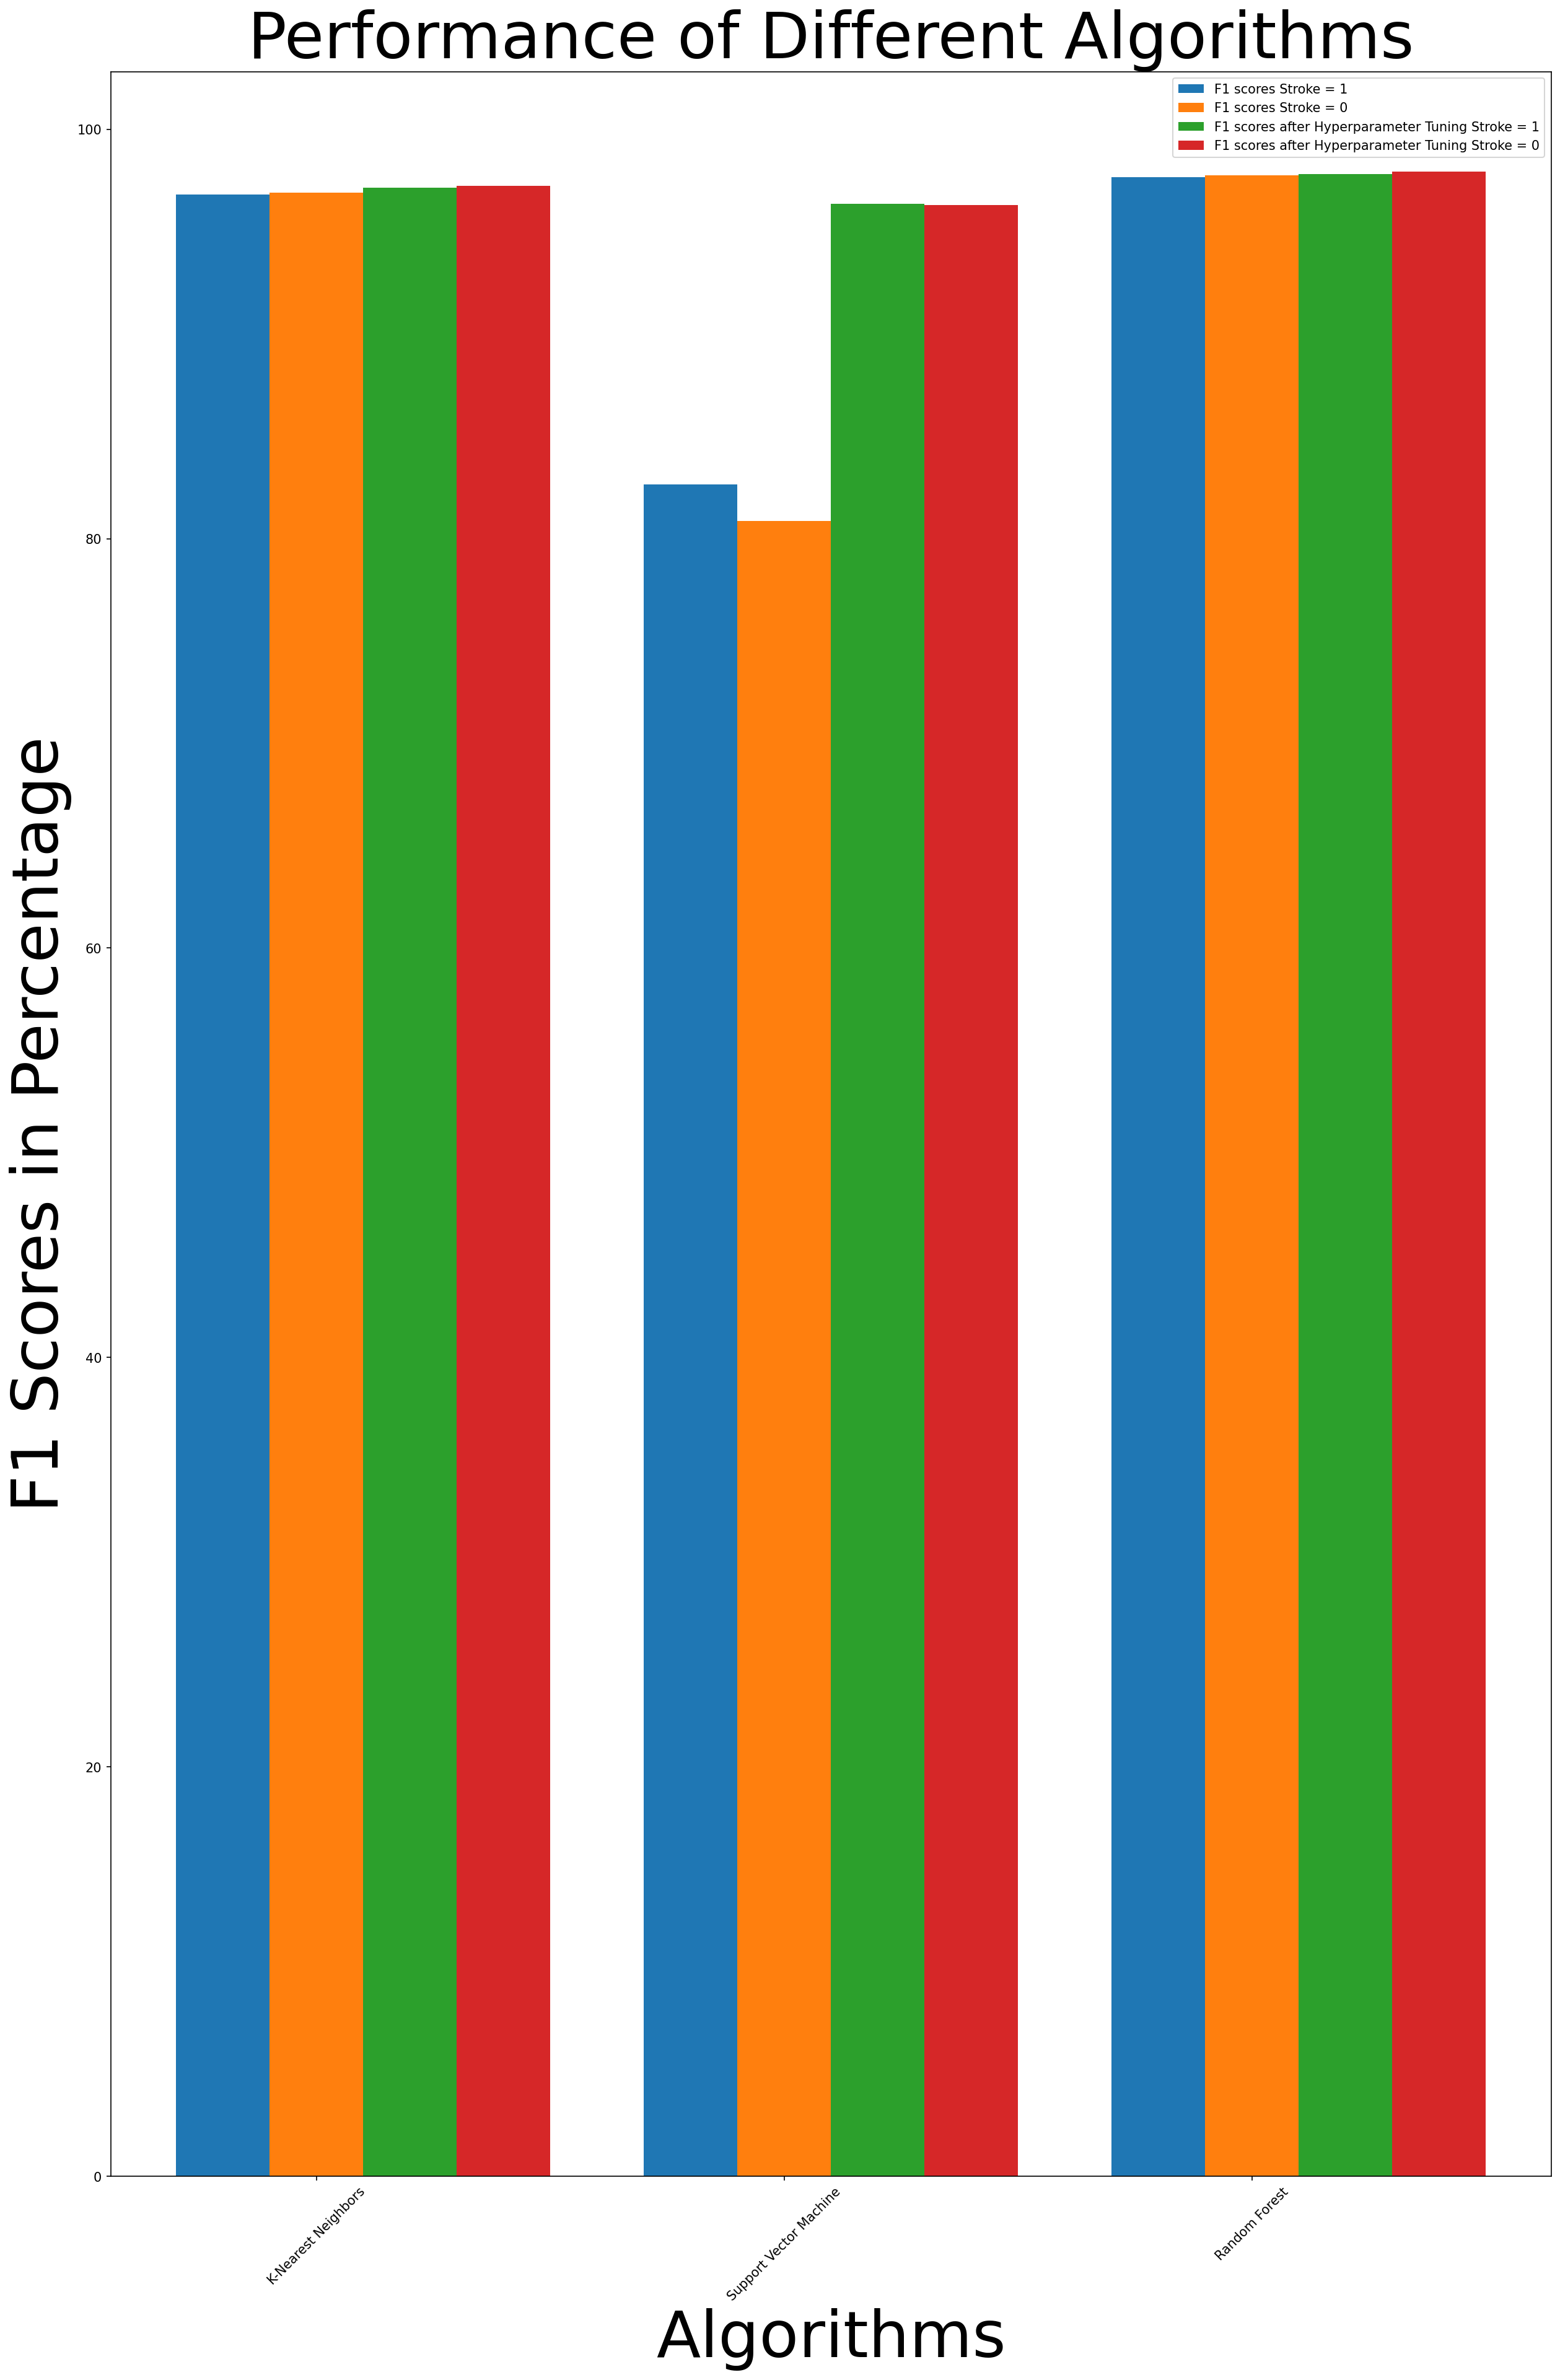

In [26]:
fig = plt.figure(figsize=(20, 30), dpi=150)
w = 0.2
X_axis_1 = np.arange(len(x_axis_labels))
X_axis_2 = [i+w for i in X_axis_1]
X_axis_3 = [i+w for i in X_axis_2]
X_axis_4 = [i+w for i in X_axis_3]

plt.bar(X_axis_1, f1_scores_original_with_stroke, w, label='F1 scores Stroke = 1')
plt.bar(X_axis_2, f1_scores_original_without_stroke, w, label='F1 scores Stroke = 0')
plt.bar(X_axis_3, f1_scores_hp_tune_with_stroke, w, label='F1 scores after Hyperparameter Tuning Stroke = 1')
plt.bar(X_axis_4, f1_scores_hp_tune_without_stroke, w, label='F1 scores after Hyperparameter Tuning Stroke = 0')

plt.xticks(X_axis_2, x_axis_labels)
plt.xticks(rotation=45)
plt.xlabel("Algorithms", fontsize=50)
plt.ylabel("F1 Scores in Percentage", fontsize=50)
plt.title("Performance of Different Algorithms", fontsize=50)
plt.legend()

# plt.savefig('conclusion.png', dpi=300, bbox_inches='tight')
plt.show()